In [36]:
from collections import defaultdict

import numpy as np
from matplotlib import pyplot as plt

plt.set_cmap('hot')


<Figure size 432x288 with 0 Axes>

In [2]:
with open('15.txt', 'r') as file:
    data = [int(s) for s in file.read().split(',')]


In [3]:
class Halt(Exception):
    pass


class Yield(Exception):
    pass


class VM:
    def __init__(self, memory, inputs, outputs):
        self.ops = {1: self.add, 
                    2: self.mul, 
                    3: self.input_, 
                    4: self.output, 
                    5: self.jnz,
                    6: self.jz,
                    7: self.lt,
                    8: self.eq,
                    9: self.rbo,
                    99: self.hcf}
        self.memory = memory
        self.pointer = 0
        self.base = 0
        self.inputs = inputs
        self.outputs = outputs

    def run(self):
        while self.step():
            pass
        
    def step(self):
        try:
            while True:
                self.ops[self.read(self.pointer) % 100]()
        except Yield:
            return True
        except Halt:
            return False

    def add(self):
        a, b, c = self.decode(3)
        self.write(c, self.read(a) + self.read(b))

    def mul(self):
        a, b, c = self.decode(3)
        self.write(c, self.read(a) * self.read(b))

    def input_(self):
        a, = self.decode(1)
        self.write(a, self.inputs.pop(0))

    def output(self):
        a, = self.decode(1)
        self.outputs.append(self.read(a))
        raise Yield()

    def jnz(self):
        a, b = self.decode(2)
        if self.read(a) != 0:
            self.pointer = self.read(b)

    def jz(self):
        a, b = self.decode(2)
        if self.read(a) == 0:
            self.pointer = self.read(b)

    def lt(self):
        a, b, c = self.decode(3)
        self.write(c, 1 if self.read(a) < self.read(b) else 0)

    def eq(self):
        a, b, c = self.decode(3)
        self.write(c, 1 if self.read(a) == self.read(b) else 0)
        
    def rbo(self):
        a, = self.decode(1)
        self.base += self.read(a)

    def hcf(self):
        raise Halt()

    def decode(self, count):
        mode = self.read(self.pointer) // 100
        self.pointer += 1

        params = []
        for i in range(count):
            value = self.pointer
            if mode % 10 == 0:
                value = self.read(value)
            elif mode % 10 == 2:
                value = self.base + self.read(value)
            params.append(value)
            self.pointer += 1
            mode //= 10
        return params
    
    def read(self, offset):
        self.extend(offset)
        return self.memory[offset]
    
    def write(self, offset, value):
        self.extend(offset)
        self.memory[offset] = value
    
    def extend(self, offset):
        if offset >= len(self.memory):
            self.memory.extend([0] * (offset - len(self.memory) + 1))


## Part 1

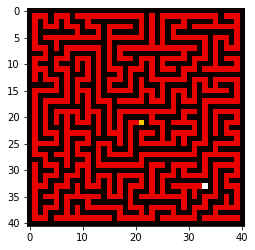

308

In [31]:
grid = defaultdict(int)

inputs = []
outputs = []
vm = VM(data.copy(), inputs, outputs)

pos = (0, 0)
grid[pos] = 1
trail = []
move = 1
while True:
    backtrack = False
    if grid[(newpos := (pos[0], pos[1] - 1))] == 0:
        move = 1
    elif grid[(newpos := (pos[0], pos[1] + 1))] == 0:
        move = 2
    elif grid[(newpos := (pos[0] - 1, pos[1]))] == 0:
        move = 3
    elif grid[(newpos := (pos[0] + 1, pos[1]))] == 0:
        move = 4
    elif trail == []:
        break
    else:
        move, newpos = trail.pop()
        move = {1: 2, 2: 1, 3: 4, 4:3}[move]
        backtrack = True

    inputs.append(move)
    vm.step()
    status = outputs.pop()
    if status == 0:
        grid[newpos] = 2
    elif status == 1:
        if not backtrack:
            trail.append((move, pos))
        grid[newpos] = 1
        pos = newpos
    elif status == 2:
        trail.append((move, newpos))
        oxypos = pos = newpos
        steps = len(trail)

image = np.zeros([41, 41])
origin = (image.shape[0] // 2 + 1, image.shape[1] // 2 + 1)
for k, v in grid.items():
    image[k[0] + origin[0], k[1] + origin[1]] = v
image[image == 2] = 0
image[origin] = 2
image[oxypos[0] + origin[0], oxypos[1] + origin[1]] = 3
plt.imshow(image.T)
plt.show()

map_ = grid.copy()
steps


## Part 2

In [35]:
grid = map_.copy()
queue = [oxypos]
steps = 0
while queue:
    moves = []
    while queue:
        pos = queue.pop(0)
        grid[pos] = 2
        if grid[(newpos := (pos[0], pos[1] - 1))] == 1:
            moves.append(newpos)
        if grid[(newpos := (pos[0], pos[1] + 1))] == 1:
            moves.append(newpos)
        if grid[(newpos := (pos[0] - 1, pos[1]))] == 1:
            moves.append(newpos)
        if grid[(newpos := (pos[0] + 1, pos[1]))] == 1:
            moves.append(newpos)
    steps += 1
    queue += moves

steps - 1


328